<h3>INF 385: Lecture 3 </h3>
<h4>Visualization, Regression, SGD, etc</h4>
<p>In which we start with basic visualization stuff, then review basics of regression and introduce the notion of gradient descent.</p>

In [1]:
# hide warnings to keep things tidy.
import warnings
warnings.filterwarnings('ignore')
import random

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
matplotlib.style.use('ggplot') # make things a bit prettier.

import pandas as pd
import statsmodels.api as sm  # this is new! we'll be using the lovely statsmodels often.

# note that I am importing the data science code from our text (Joel Grus), 
# available at: https://github.com/joelgrus/data-science-from-scratch/
import sys
# this points to the directory with all modules from the textbook.
sys.path.append("../../data-science-from-scratch/code-python3/")

<h3>Visualization</h3>

Let's get started with some basics. I like seaborn (http://stanford.edu/~mwaskom/software), which is a library on top of matplotlib. 

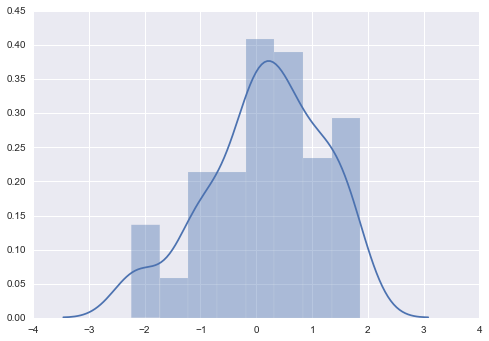

In [2]:
import seaborn as sns
x = np.random.normal(size=100)
hist_with_curve = sns.distplot(x)

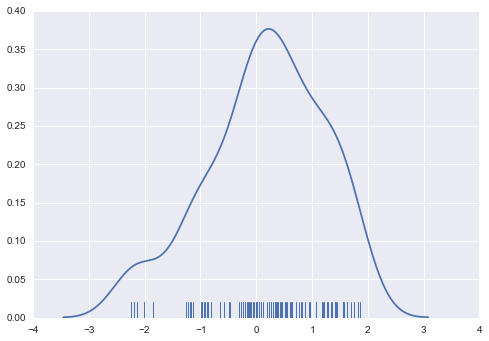

In [3]:
kde = sns.distplot(x, hist=False, rug=True)

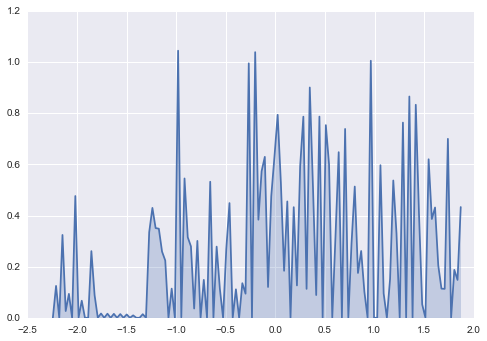

In [8]:
# 'kdeplot' provides a nice interface
# play with different bandwidths!
kde = sns.kdeplot(x, shade=True, bw=.001)

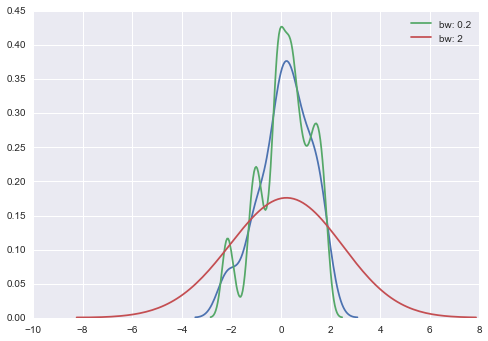

In [9]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();

So far we have focussed on univariate distributions, but we often care about **bivariate** distributions, i.e., involving two variables

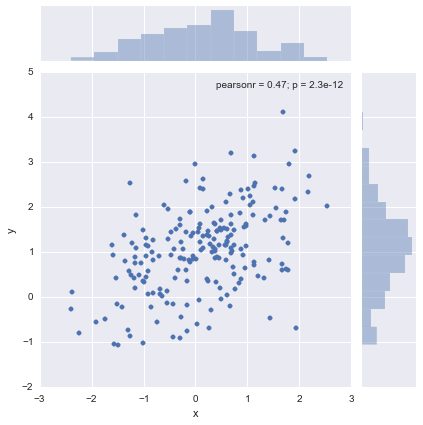

In [10]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])
sns.jointplot(x="x", y="y", data=df);

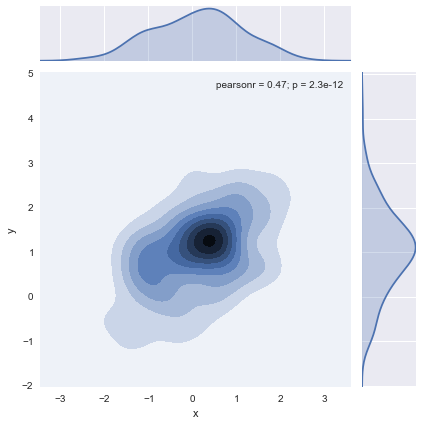

In [11]:
# can also do (join) density plots
sns.jointplot(x="x", y="y", data=df, kind="kde");

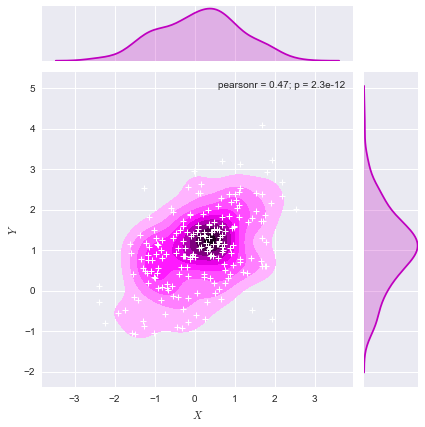

In [12]:
# getting fancier...
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

What about many variables? Let's return to Iris. 

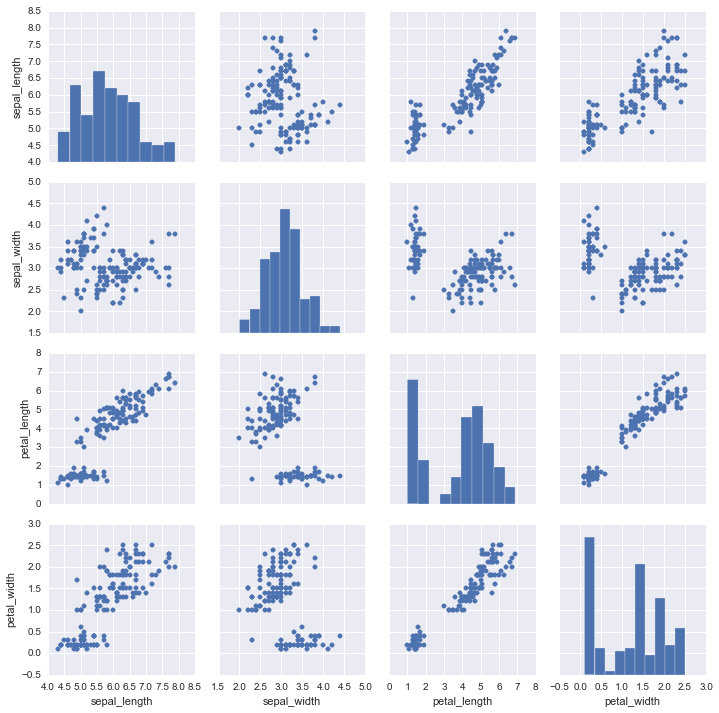

In [13]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

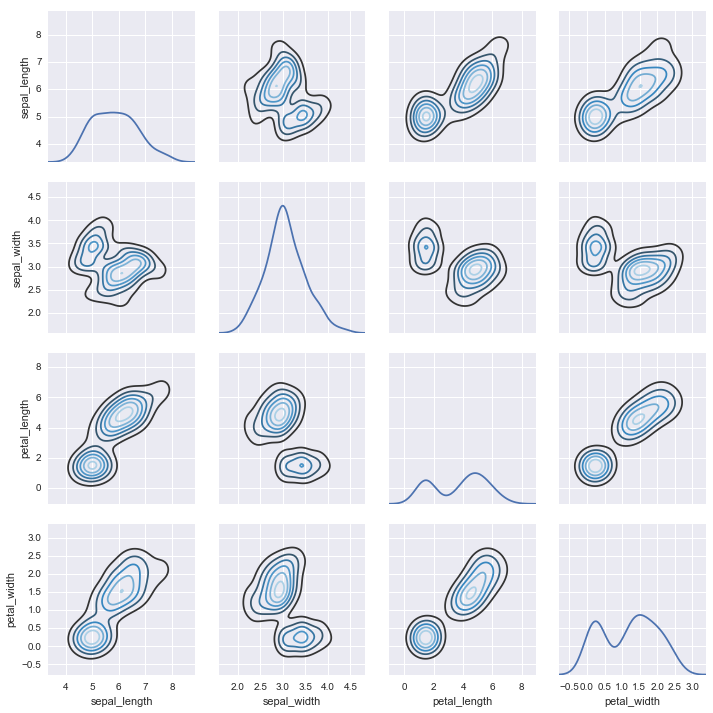

In [14]:
# and can instead use density based plots!
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);

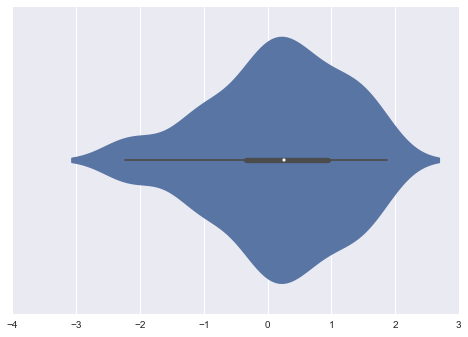

In [16]:
sns.violinplot(x);

<h2>Regression &etc</2>

In [17]:
# for linear regression 
#
# please note i had to rename his 'statistics.py' to 
# something else to avoid conflicts

import simple_linear_regression

In [18]:
# fictional data: number of friends a user has and the amount of 
# time they spend on the "datasciencester" website (again, made up)
num_friends_good = [49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
daily_minutes_good = [68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

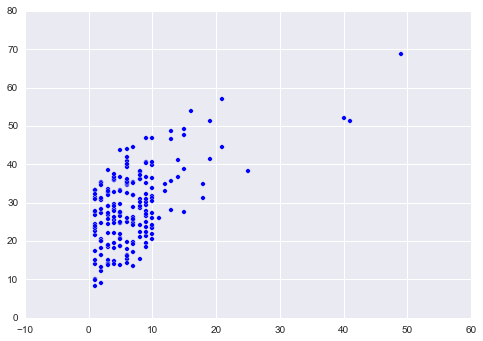

In [19]:
scatter = plt.scatter(num_friends_good, daily_minutes_good)

In [20]:
# this is the analytical/exact solution
alpha_star, beta_star = simple_linear_regression.least_squares_fit(
        num_friends_good, daily_minutes_good)
print("alpha star: %f; beta_star: %f" % (alpha_star, beta_star))

alpha star: 22.947552; beta_star: 0.903866


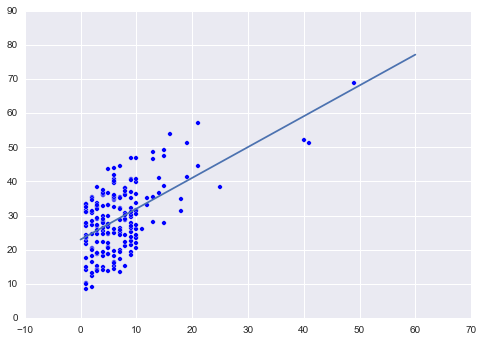

In [21]:
x = np.linspace(0, 60, 100)
y_hat = [alpha_star + beta_star * x_i for x_i in x] 
scatter = plt.scatter(num_friends_good, daily_minutes_good)
scatter = plt.plot(x, y_hat) 

Now let's take a look at the gradient descent version.

First we define our error function and our partial gradients; we saw how to do the latter in class.

In [23]:
def predict(alpha, beta, x_i):
    return beta * x_i + alpha

def error(alpha, beta, x_i, y_i):
    return y_i - predict(alpha, beta, x_i)

def squared_error(x_i, y_i, theta):
    alpha, beta = theta
    return error(alpha, beta, x_i, y_i) ** 2

def sum_of_squares(x, y, theta):
    return sum([squared_error(x_i, y_i, theta) for x_i, y_i in zip(x,y)])

def squared_error_gradient(x_i, y_i, theta):
    alpha, beta = theta
    return np.array(
           [-2 * error(alpha, beta, x_i, y_i),       # alpha partial derivative
            -2 * error(alpha, beta, x_i, y_i) * x_i]) # beta partial derivative

In [24]:
# hyper-parameters
learning_rate = .00001
last_change = np.inf 
convergence_threshold = .01
max_iterations = 5000

# starting point
theta = np.random.uniform(size=2)
iter_ = 0 

In [25]:
iter_ = 0
last_error = np.inf

while last_change >= convergence_threshold and iter_ < max_iterations:
    # evaluate the derivative for each of our data points
    iter_ += 1
    delta = np.array([0.0,0.0])
    for x_i, y_i in zip(num_friends_good, daily_minutes_good):
        grad_i = squared_error_gradient(x_i, y_i, theta)    
        theta = theta - learning_rate * grad_i
    
    #theta = theta - learning_rate * delta
    cur_error = sum_of_squares(num_friends_good, daily_minutes_good, theta)
    last_change = abs(cur_error - last_error)
    last_error = cur_error
    
    if iter_ % 100 == 0:
        print("--- on iter %s ---\n theta is: %s\n error is: %s\n step size is %s" % 
              (iter_, theta, cur_error, learning_rate))
  

    

--- on iter 100 ---
 theta is: [ 4.31995015  2.50179434]
 error is: 45274.9571734
 step size is 1e-05
--- on iter 200 ---
 theta is: [ 7.4331019   2.23485306]
 error is: 35449.0844989
 step size is 1e-05
--- on iter 300 ---
 theta is: [ 10.02564296   2.01255223]
 error is: 28633.7862822
 step size is 1e-05
--- on iter 400 ---
 theta is: [ 12.18463479   1.82742665]
 error is: 23906.5072264
 step size is 1e-05
--- on iter 500 ---
 theta is: [ 13.98257957   1.67325952]
 error is: 20627.4213279
 step size is 1e-05
--- on iter 600 ---
 theta is: [ 15.47985502   1.54487368]
 error is: 18352.7818875
 step size is 1e-05
--- on iter 700 ---
 theta is: [ 16.72674191   1.43795773]
 error is: 16774.8283836
 step size is 1e-05
--- on iter 800 ---
 theta is: [ 17.76511257   1.34892128]
 error is: 15680.1108374
 step size is 1e-05
--- on iter 900 ---
 theta is: [ 18.62983708   1.27477434]
 error is: 14920.5869408
 step size is 1e-05
--- on iter 1000 ---
 theta is: [ 19.34995416   1.21302696]
 error i

<h3>Practical regression in Python</h3>
In practice, of course, you would almost certainly not want to rely on your own parameter estimation code; better to rely on established, well-tested libraries. Let's have a look at performing regression in Python; specifically in statsmodels. 

In [28]:
# (this is directly from the statsmodels doc)
# create some (artificial)
nsample = 100
x = np.linspace(0, 10, 100)
#print(x)
X = np.column_stack((x, x**2))
#print(X)

beta = np.array([1, 0.1, 10])
# note that this is our error! 
e = np.random.normal(size=nsample)
X = sm.add_constant(X) # add a column with a constant '1'
y = np.dot(X, beta) + e


In [29]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.995e+06
Date:                Thu, 04 Feb 2016   Prob (F-statistic):          3.86e-239
Time:                        16:48:57   Log-Likelihood:                -146.84
No. Observations:                 100   AIC:                             299.7
Df Residuals:                      97   BIC:                             307.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.8076      0.314      2.574      0.0

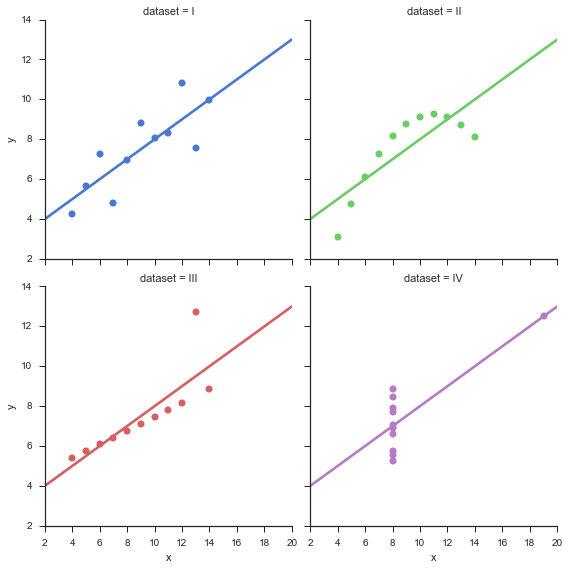

In [30]:
# note that seaborn -- a popular plotting library that I'm fond of 
# (it sits on top of matplotlib) can reproduce anscombe's quartet easily!
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 1})


In [31]:
# this interface allows for "formula notation" 
import statsmodels.formula.api as smf
# read in some data (this is posted under "files/datasets" on Canvas)
data = pd.read_csv("/Users/byron/Dropbox/teaching/data-mining-course/Spring2016/datasets/Advertising.csv")
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
# predict sales as a function of TV
lm = smf.ols(formula='Sales ~ TV', data=data).fit()
lm.summary()